## Predicting Fraudulent Transactions for a Financial Company

## NAME : PRACHI NIKHARE

## IMPORTS LIBRARIES

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
farud_trans = pd.read_csv("Fraud.csv")

In [3]:
farud_trans

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
farud_trans.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
farud_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
farud_trans.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Checking Missing Values

In [7]:
farud_trans.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
farud_trans.count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [9]:
farud_trans.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [10]:
farud_trans["isFraud"]

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [11]:
farud_trans["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
farud_trans["isFlaggedFraud"]

0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: isFlaggedFraud, Length: 6362620, dtype: int64

## From the above obseravation it seems the ratio of Fraud to Not Fraud is  very low which indicates Unbalanced Data.

In [13]:
farud_trans["isFlaggedFraud"].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

## It seems Same for the FlaggedFraud Cases

In [14]:
fraudby_type = farud_trans.groupby("type")["isFraud"].count()
fraudby_type

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: isFraud, dtype: int64

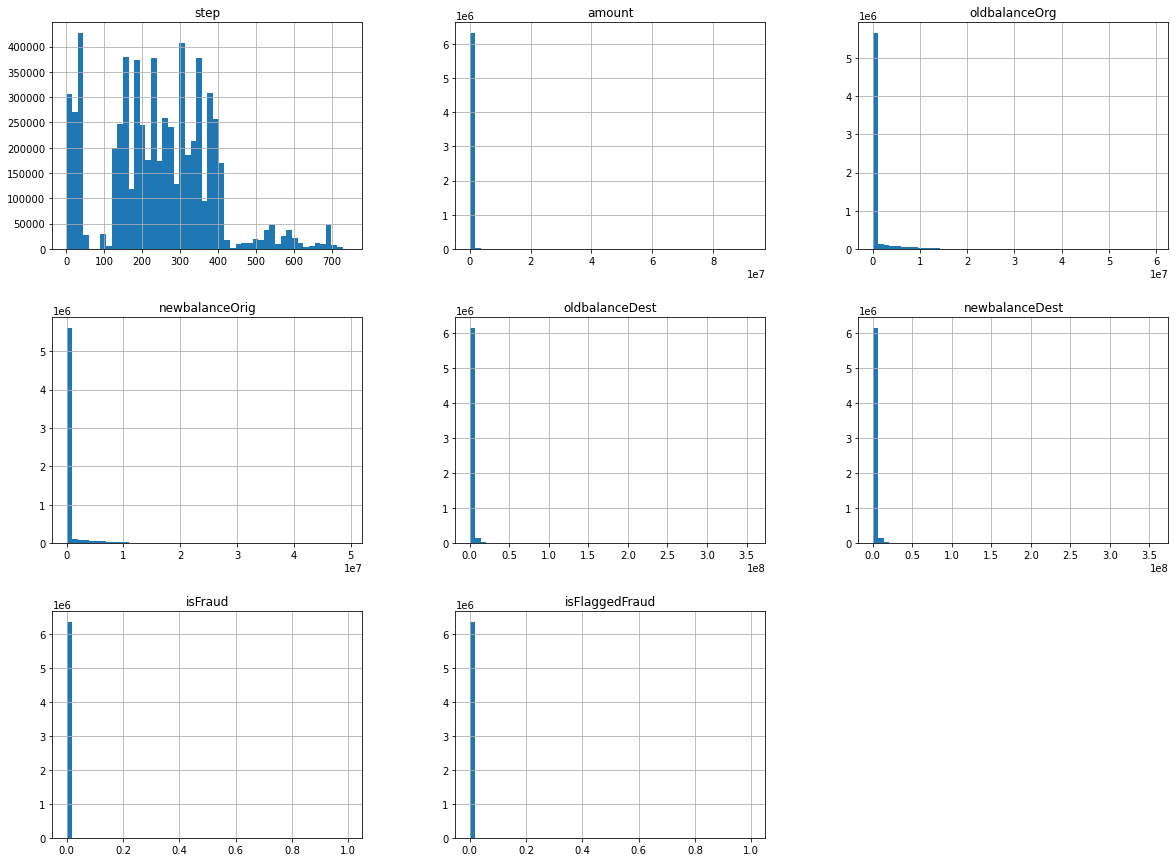

In [15]:
# for plotting histogram
%matplotlib inline
import matplotlib.pyplot as plt
farud_trans.hist(bins=50,figsize=(20,15))
plt.show()

## Visualizing Datasets

In [16]:
# checking the different types of steps involved in transactions
steps = farud_trans['step'].value_counts().nunique()
print("The no. of different steps involved in transactions are :", steps)

The no. of different steps involved in transactions are : 428


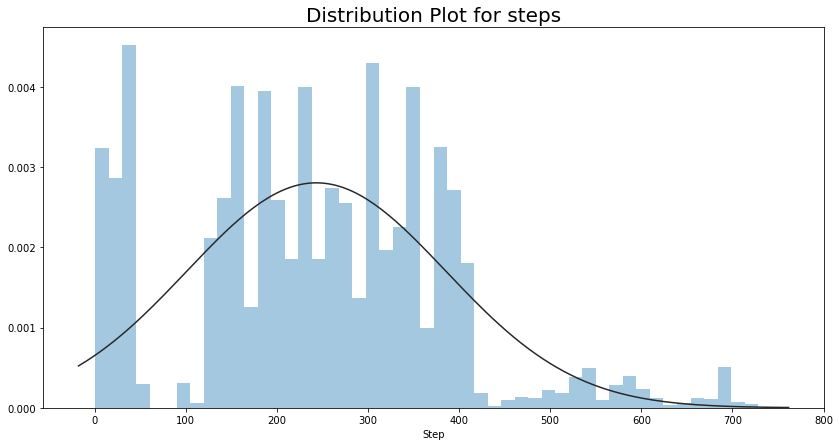

In [17]:
import seaborn as sns
plt.rcParams['figure.figsize'] =(14, 7)
sns.distplot(farud_trans.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

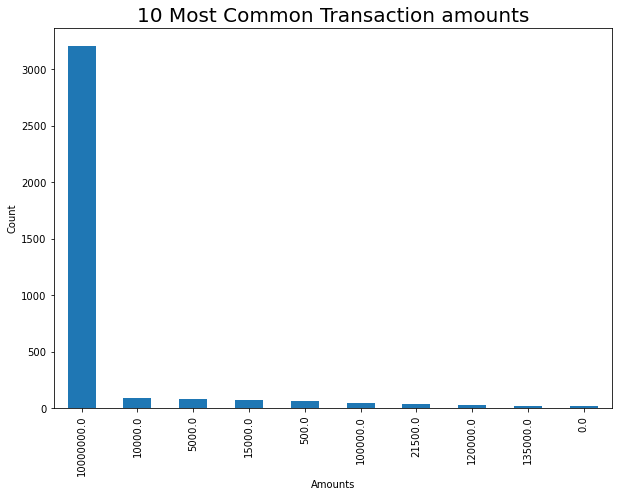

In [18]:
# Checking the different values of amounts transationed
plt.rcParams['figure.figsize'] = (10, 7)
farud_trans['amount'].value_counts().head(10).plot.bar()
plt.title('10 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('Count')
plt.show()

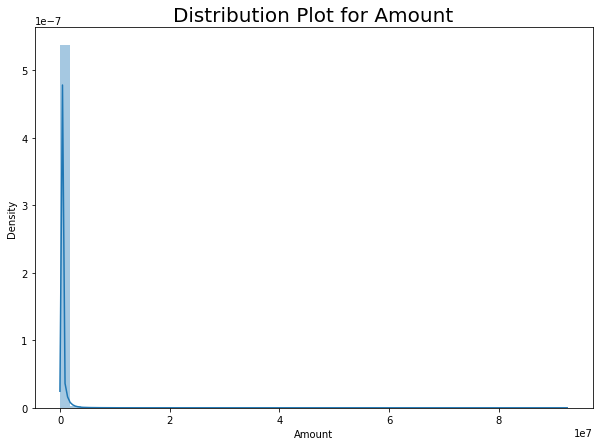

In [19]:
#Distribution Plot for Amount
ax = sns.distplot(farud_trans.amount)
ax.set_title(label = 'Distribution Plot for Amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

In [20]:
farud_transFraudPayment = farud_trans.loc[(farud_trans.isFraud == 1) & (farud_trans.type == 'PAYMENT')]
farud_transFraudTransfer = farud_trans.loc[(farud_trans.isFraud == 1) & (farud_trans.type == 'TRANSFER')]
farud_transFraudCashout = farud_trans.loc[(farud_trans.isFraud == 1) & (farud_trans.type == 'CASH_OUT')]
farud_transFraudCashin = farud_trans.loc[(farud_trans.isFraud == 1) & (farud_trans.type == 'CASH_IN')]
farud_transFrauddebit = farud_trans.loc[(farud_trans.isFraud == 1) & (farud_trans.type == 'DEBIT')]
print ('The number of fraudulent TRANSFERs = {}'.format(len(farud_transFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(farud_transFraudCashout)))
print ('The number of fraudulent CASH_Ins = {}'.format(len(farud_transFraudCashin)))
print ('The number of fraudulent Debits = {}'.format(len(farud_transFrauddebit)))
print ('The number of fraudulent Payments = {}'.format(len(farud_transFraudPayment)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116
The number of fraudulent CASH_Ins = 0
The number of fraudulent Debits = 0
The number of fraudulent Payments = 0


## From above observations it seem most of Fradulent tranctions was from TRANSFERS and CASH_OUT

In [21]:
# Finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", farud_trans.loc[(farud_trans.isFraud == 1) & (farud_trans.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", farud_trans.loc[(farud_trans.isFraud == 1) & (farud_trans.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", farud_trans.loc[(farud_trans.isFraud == 1) & (farud_trans.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", farud_trans.loc[(farud_trans.isFraud == 1) & (farud_trans.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [22]:
# Figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = farud_trans.loc[(farud_trans.isFlaggedFraud == 1) & (farud_trans.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# Printing the minimum and maximum transactions done when FlaggedFraud is set
# The Transaction mode being Transfer
print("Minimum Transaction :", farud_trans.loc[farud_trans.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", farud_trans.loc[farud_trans.isFlaggedFraud == 1].amount.max())

The no. of Flagged Fraudulent Transactions : 16
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


## Dataset where only Transfer Transactions are mentioned

In [23]:
# Defining a dataset containing only transfer type of transactions
dataTransfer = farud_trans.loc[farud_trans['type'] == 'TRANSFER']
dataTransfer = pd.DataFrame(dataTransfer)
dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


In [24]:
# Frauds having same old and new balance
# Sorted by old orignal balance to check original old balance for flagged frauds
dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)
# This table shows flagged frauds with minimum original old balance

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6351225,702,TRANSFER,3171085.59,C1892216157,3171085.59,3171085.59,C1308068787,0.0,0.0,1,1
6296014,671,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1


In [25]:
# Frauds having same old and new balance
# Sorted by old orignal balance to check original old balance for flagged frauds
dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)
# This table shows flagged frauds with minimum original old balance

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
6362584,741,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
6281484,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.0,0.0,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1


In [26]:
# Finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = farud_trans.loc[farud_trans.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())

Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : 353874.22
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : 19585040.37


In [27]:
#Since frad has occured for type TRANSFER AND CASHOUT
X = farud_trans.loc[(farud_trans.type == 'TRANSFER') | (farud_trans.type == 'CASH_OUT')]
X.shape

(2770409, 11)

In [28]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [29]:
# Removing Unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)
X.shape

(2770409, 9)

## Preprocessing and Feature Engineering
Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [30]:
#Adding New Features to Dataset
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X.shape

(2770409, 11)

In [31]:
#One Hot Encoding For Categorical Variable Type
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [32]:
X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0,0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0,0,0.00,54744.51


In [33]:
#Checiking the No of Fraus cases in New Datasets
X['isFraud'].value_counts()


0    2762196
1       8213
Name: isFraud, dtype: int64

In [34]:
# Prearing Datasets
Y = X['isFraud'] # Target Variable

X = X.drop(['isFraud'], axis = 1) # REmoving target variable
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)

Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


In [35]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [36]:
Y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X, Y)

print("Shape of X: ", X_resampled.shape)
print("Shape of Y:", y_resampled.shape)

Shape of X:  (5524392, 10)
Shape of Y: (5524392,)


## Splitting the dataset into train and tests

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [40]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)

print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (4419513, 10)
Shape of y_train:  (4419513,)
Shape of x_test:  (1104879, 10)
Shape of y_test:  (1104879,)


In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=2)

In [43]:
%%time
model.fit(x_train, y_train)

Wall time: 45.7 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [44]:
x_preds = model.predict(x_train)

In [45]:
from sklearn.metrics import average_precision_score
auprc = average_precision_score(y_train, x_preds)
print("The Area under Precision Recall Curve Score For x_train is", auprc)

The Area under Precision Recall Curve Score For x_train is 0.9991634389457935


In [46]:
y_preds = model.predict(x_test)
auprc = average_precision_score(y_test, y_preds)
print("The Area under Precision Recall Curve Score For y_train is", auprc)

The Area under Precision Recall Curve Score For y_train is 0.9991653612203945


In [47]:
X.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud',
       'errorBalanceOrig', 'errorBalanceDest'],
      dtype='object')

## Feature importance

In [48]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [49]:
importance_df.head(10)

,feature,importance
8,errorBalanceOrig,0.823352
4,newbalanceOrig,0.132328
9,errorBalanceDest,0.041414
3,oldbalanceOrg,0.001978
0,step,0.000580
5,oldbalanceDest,0.000348
1,type,0.000000
2,amount,0.000000
6,newbalanceDest,0.000000
7,isFlaggedFraud,0.000000


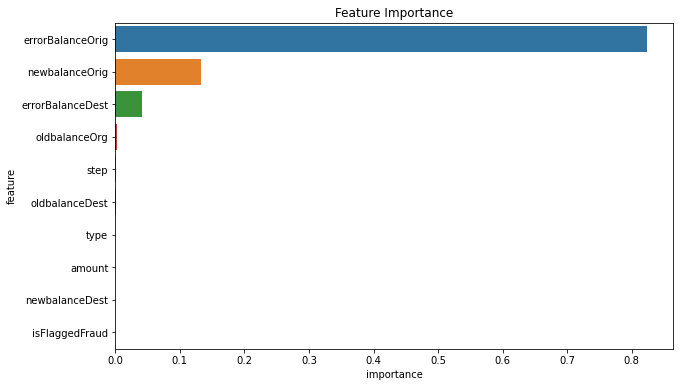

In [50]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## From Observing 19th Tree and Feature importance Table, we can conclude the most imortant features is Error Balance origin.

In [51]:
#Comparing actual outcomes v/s predicted outcomes
from sklearn.metrics import accuracy_score
y_pred = (y_preds > 0.5)

myaccuracy=accuracy_score(y_test,y_pred)
print( myaccuracy)

0.9977481697090813


## Let's also implement a Logistic Regression model and Decide, what is best ?

In [52]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [53]:
# Obtain model predictions
predicted = model.predict(x_test)

In [54]:
# Print the classifcation report and confusion matrix
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95    551906
           1       0.95      0.95      0.95    552973

    accuracy                           0.95   1104879
   macro avg       0.95      0.95      0.95   1104879
weighted avg       0.95      0.95      0.95   1104879

Confusion matrix:
 [[523519  28387]
 [ 29650 523323]]


In [55]:
accuracy1=accuracy_score(y_test,predicted)
print(accuracy1)

0.9474720761277932


## Comparing the Accuracy Score Of above two Models, We can conclude Accuray of XGBoost Model is Highest